EJERCICIO 2

$(1)$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def spline(x,y):
  n=len(x)
  a={k: v for k,v in enumerate(y)}
  h={k:x[k+1]-x[k] for k in range(n-1)}


  A=[[1]+[0]*(n-1)]
  for i in range(1,n-1):
    row=[0]*n
    row[i-1]=h[i-1]
    row[i]=2*(h[i-1]+h[i])
    row[i+1]=h[i]
    A.append(row)
  A.append([0]*(n-1)+[1])
  B=[0]
  for k in range (1,n-1):
    row=3*(a[k+1]-a[k])/h[k]-3*(a[k]-a[k-1])/h[k-1]
    B.append(row)
  B.append(0)
  c=dict(zip(range(n),np.linalg.solve(A,B)))

  b={}
  d={}
  for k in range(n-1):
    b[k]=(1/h[k])*(a[k+1]-a[k])-(h[k]/3)*(2*c[k]+c[k+1])
    d[k]=(c[k+1]-c[k])/(3*h[k])

  s={}
  for k in range(n-1):
    eq=f'{a[k]}{b[k]:+}*(x-{x[k]}){c[k]:+}*(x-{x[k]})**2{d[k]:+}*(x-{x[k]})**3'
    s[k]={'eq':eq,'dominio':[x[k],x[k+1]]}


  return s



x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y=[1,3,6,25,73,222,294,258,237,191,125,69,27,11,4]


eqs=spline(x,y)
print(eqs)

{0: {'eq': '1+2.9079219611941243*(x-0)+0.0*(x-0)**2-0.9079219611941246*(x-0)**3', 'dominio': [0, 1]}, 1: {'eq': '3+0.184156077611751*(x-1)-2.7237658835823737*(x-1)**2+5.539609805970623*(x-1)**3', 'dominio': [1, 2]}, 2: {'eq': '6+11.355453728358873*(x-2)+13.895063534329495*(x-2)**2-6.2505172626883665*(x-2)**3', 'dominio': [2, 3]}, 3: {'eq': '25+20.394029008952764*(x-3)-4.856488253735604*(x-3)**2+32.46245924478284*(x-3)**3', 'dominio': [3, 4]}, 4: {'eq': '73+108.0684302358301*(x-4)+92.53088948061293*(x-4)**2-51.59931971644303*(x-4)**3', 'dominio': [4, 5]}, 5: {'eq': '222+138.33225004772686*(x-5)-62.26706966871614*(x-5)**2-4.0651803790107435*(x-5)**3', 'dominio': [5, 6]}, 6: {'eq': '294+1.6025695732623575*(x-6)-74.46261080574837*(x-6)**2+36.860041232486005*(x-6)**3', 'dominio': [6, 7]}, 7: {'eq': '258-36.74252834077637*(x-7)+36.117512891709644*(x-7)**2-20.374984550933277*(x-7)**3', 'dominio': [7, 8]}, 8: {'eq': '237-25.63245621015691*(x-8)-25.007440761090184*(x-8)**2+4.63989697124709*(x-8

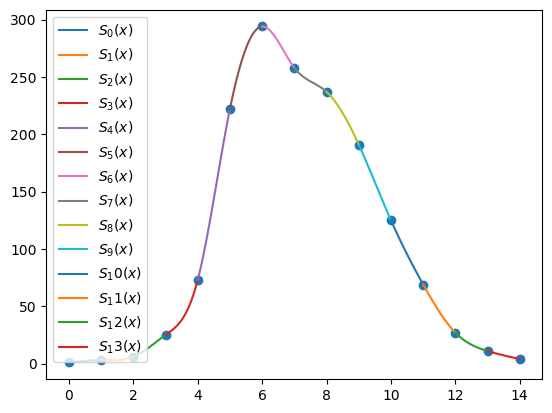

In [36]:

#GRAFICA
for key, value in eqs.items():
  def p(x):
    return eval(value['eq'])
  t=np.linspace(*value['dominio'],100)
  plt.plot(t,p(t),label=f"$S_{key}(x)$")
  

plt.scatter(x,y)
plt.legend()
plt.savefig('spline.png')

$(2)$

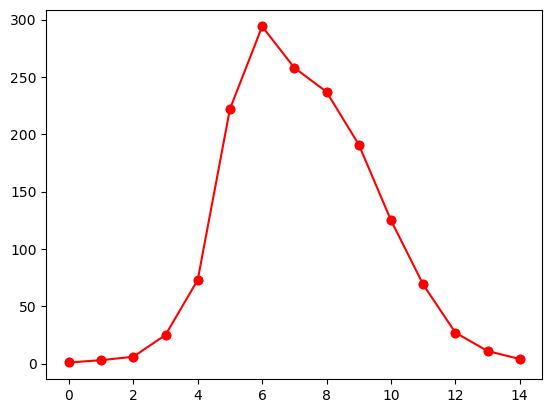

In [35]:
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
y=[1,3,6,25,73,222,294,258,237,191,125,69,27,11,4]
plt.plot(x,y,marker='o',linestyle='-',color='r')
plt.plot(x,y,"ro")
plt.show()